# Exploratory Data Analysis on the Factors of Red Wine Quality
By Sofyan Sahrom

Research Question: Which chemical properties influence the quality of red wines?

Background:
Red Wine quality is graded by experts on a scale of 0 (very bad) to 10 (very excellent). To help understand what are the factors that determine the wine quality, the physicochemical properties of the  wine was investigated. This is a qualititave measurement. 

By examining the physicochemical properties of wines of different grades, it might be possible to investigate whether there are factors or variables that can help determine the quality of red wine. This can help to quantify some of the grading process of the what is eitherwise a very qualitative measurement. This information in turn can be used in the future to help create a preliminary grading of wine quality (based on quantifiable measures) or something smiliar alomg that line. 

Therefore the quality of wine will be the dependent variable while the physicochemical properties of the wine will be the independent variables or factors. 


In [22]:
# Stage 1a - Preparation of Battlefield - Loading of all relevant dependancies and libaries
library("ggplot2")
library("dplyr")
library("e1071")  
# library("gridExtra")
# library(Simpsons)
# library(GGally)
# library(memisc)
# library(pander)
# library(corrplot)

In [23]:
# Stage 1b - Loading and Reconnaisance of Data
wine <- read.csv('wineQualityReds.csv') # Loading the csv file
head(wine) # Reconnaisance of Data - Preview of dataframe
str(wine) # Struture and Details of the Data
summary(wine) # General Descriptive Statistics of the Data

X,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


'data.frame':	1599 obs. of  13 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...


       X          fixed.acidity   volatile.acidity  citric.acid   
 Min.   :   1.0   Min.   : 4.60   Min.   :0.1200   Min.   :0.000  
 1st Qu.: 400.5   1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090  
 Median : 800.0   Median : 7.90   Median :0.5200   Median :0.260  
 Mean   : 800.0   Mean   : 8.32   Mean   :0.5278   Mean   :0.271  
 3rd Qu.:1199.5   3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420  
 Max.   :1599.0   Max.   :15.90   Max.   :1.5800   Max.   :1.000  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.900   Min.   :0.01200   Min.   : 1.00       Min.   :  6.00      
 1st Qu.: 1.900   1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00      
 Median : 2.200   Median :0.07900   Median :14.00       Median : 38.00      
 Mean   : 2.539   Mean   :0.08747   Mean   :15.87       Mean   : 46.47      
 3rd Qu.: 2.600   3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00      
 Max.   :15.500   Max.   :0.61100   Max.   :72.00       Max.   :289.0

Understanding the Data:

Reconnaisannce of the DataFrame revealed that 11 physicochemical properties were recorded. This will be the independent variables of interest or factors that may have an effect on the quality of wine.  

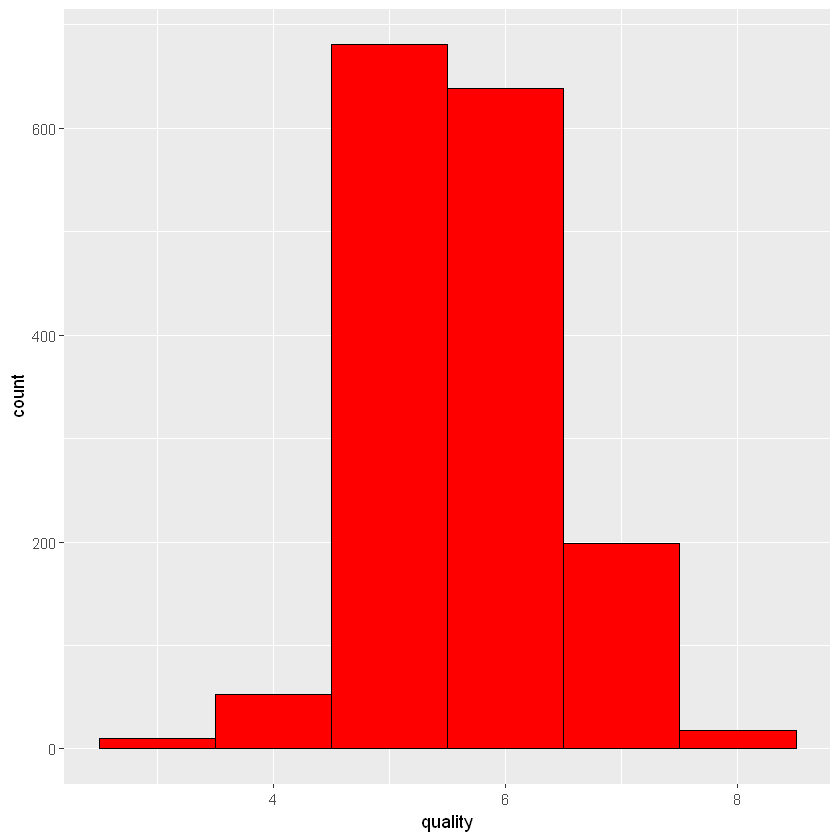

In [24]:
# Stage 2 - Plotting the Layout of Battlefield (Distribution)
ggplot(data = wine, aes(x = quality)) +
  geom_bar(width = 1, color = 'black',fill = I('red'))

Surveying the Battlefield:
1) Distribution: Kurtosis
Based on the distribution of the wine quality, it seems that majority of the red wines in the samples have been graded at 5 and 6, each with at least 600 counts. While this means that we are likely able to assess which physicochemical properties that make up wines at theses grades (5 and 6) and do so confidently, we might not be able to do the same with the other grades and perhaps more importantly compares across grades. In fact, the wines of other grades, may actually appear like outliers rather than the norm. That means we can conclude that wine of quality 5 or 6 may have a certain set of physichemical properties (with confidence), we might not be so confident (statistically) in determining if a higher level or lower level is better.  

2) Sample Population
As mentioned, the main wines are of grades 5 and 6. It is possible that this sampling could not have been done properly or biased.  

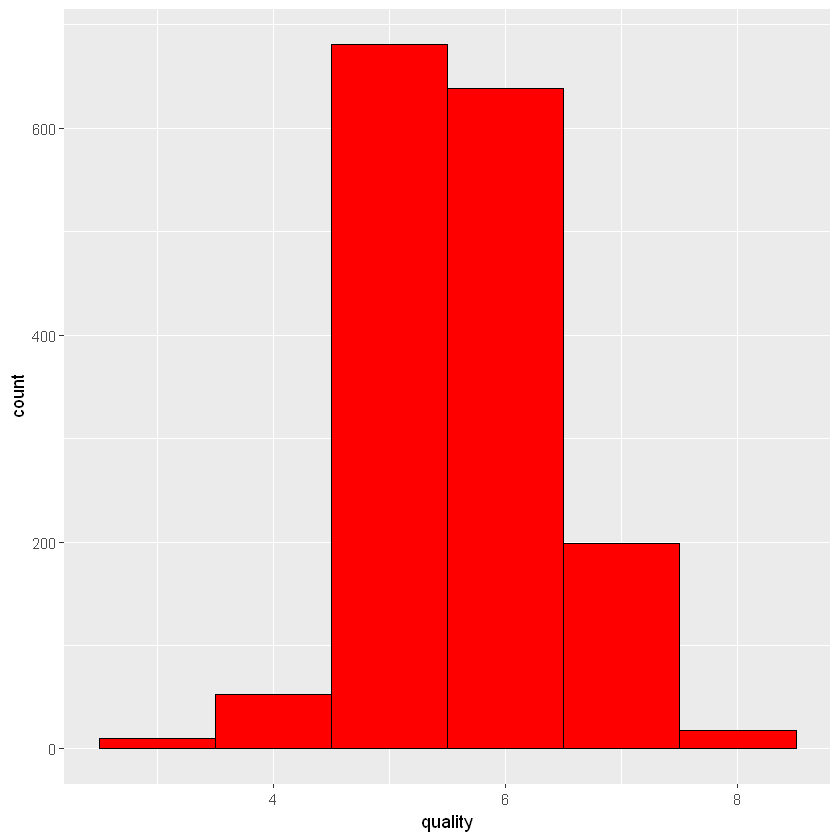

In [25]:
ggplot(data = wine, aes(x = quality)) +
  geom_bar(width = 1, color = 'black',fill = I('red'))

The next step, would be to assess which of the 11 physicochemical properties are might have an effect on the wine quality. Once we are aware of which properties, we can then narrow down and do a more detailed examination. 


In [35]:
# Function that get a basic histogram with a default binwidth of range/30
get_basic_bar <- 
  function(column, data) {
    return(ggplot(aes(x = column), data = wine) + 
             geom_bar()+
              scale_x_discrete(breaks = seq(3,8,1)) ) }

ERROR: Error in basic_boxplot_hist_log10(red_wine$fixed.acidity, "fixed acidity(log10 transform)", : could not find function "basic_boxplot_hist_log10"


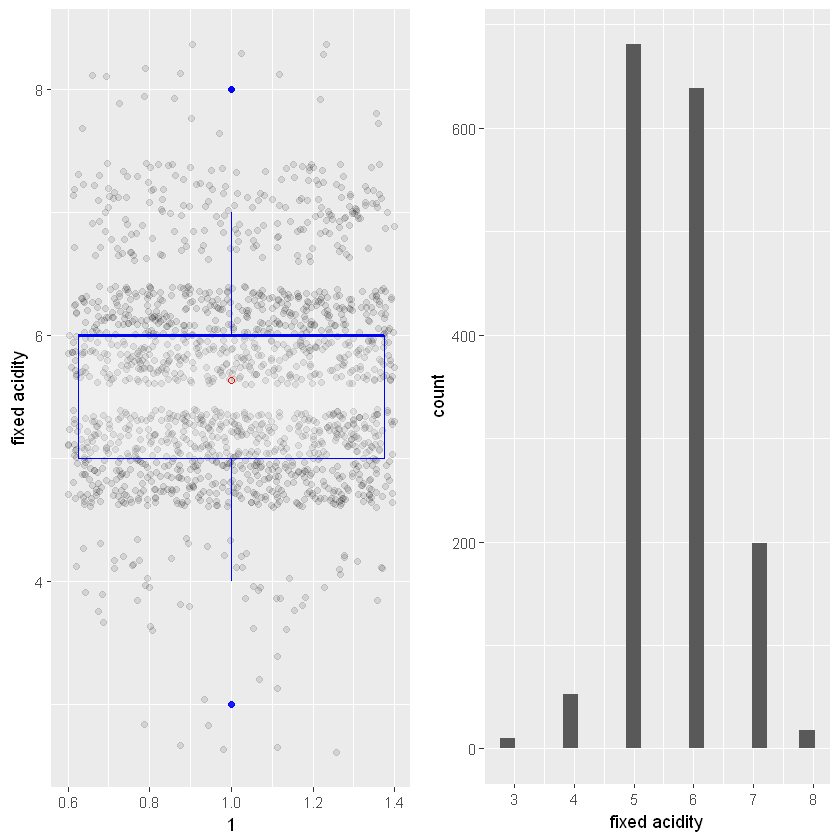

In [36]:
basic_boxplot_hist(red_wine$fixed.acidity, "fixed acidity", b=20)
basic_boxplot_hist_log10(red_wine$fixed.acidity, 
                         "fixed acidity(log10 transform)", b=20)
summary(red_wine$fixed.acidity)

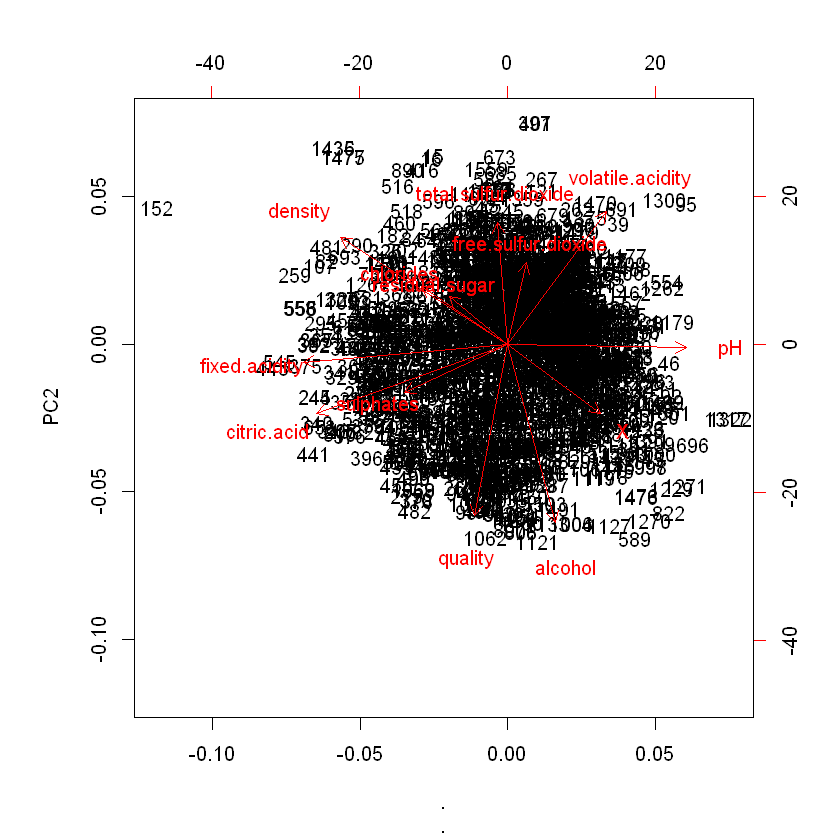

In [39]:
temp_red.wine<-length(as.matrix(wine))/length(wine)
#PCA analysis
pcx<-prcomp(wine, scale=TRUE)
#plotting using biplot

biplot(pcx, xlab=rep('.', temp_red.wine))

Warning message:
"Removed 8 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 8 rows containing missing values (geom_point)."Warning message:
"Removed 8 rows containing non-finite values (stat_bin)."

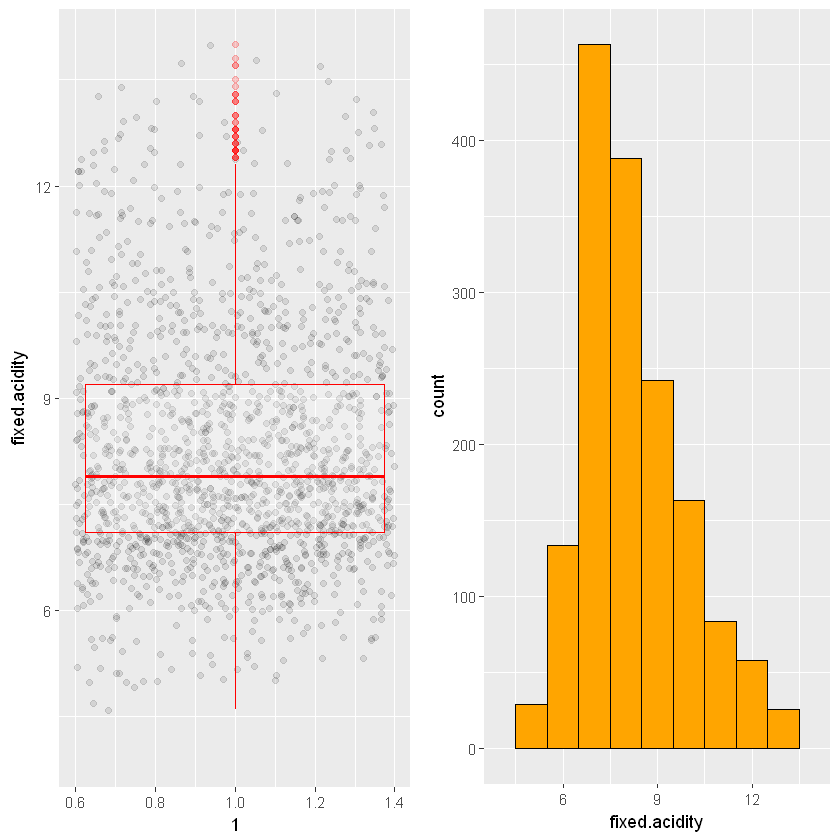

In [31]:
grid.arrange(ggplot(wine, aes( x = 1, y = fixed.acidity ) ) + 
               geom_jitter(alpha = 0.1 ) +
               geom_boxplot(alpha = 0.2, color = 'red' ) +
               scale_y_continuous(lim = c(4,14)),
ggplot(data = wine, aes(x = fixed.acidity)) +
  geom_histogram(binwidth = 1, color = 'black',fill = I('orange')) + 
  scale_x_continuous(lim = c(4,14)),ncol = 2)

In [ ]:
# Checking for Skewnesss and Kurtosis
quality = wine$quality
alcohol = wine$alcohol
sulphates = wine$sulphates
pH = wine$ph
density = wine$density
kurtosis <- c(kurtosis(quality), skewness(quality), kurtosis(alcohol), skewness(alcohol), kurtosis(sulphates), skewness(sulphates), kurtosis(pH), skewness(pH), )
skewness <- c()
distribution
colnames(distribution) <- c("fixed.acidity", "volatile.acidity", "citric.acid", "residual.sugar", "chlorides", "free.sulfur.dioxide", "total.sulfur.dioxide", "density", "pH", "sulphates", "alcohol", "quality")
rownames(distribution) <- c("kurtosis", "skewness")
distribution
